Matematiikassa <i>algoritminen ongelma</i> on jokin ongelma, johon jokaisella sallitulla syötteellä saadaan jokin tietty vastaus (tuloste). Esimerkiksi kysymys "Onko kokonaisluku $a$ alkuluku?" on algoritminen ongelma, johon vastaus on luvusta $a$ riippuen "kyllä" tai "ei". Tätä ongelmaa kutsutaan nimellä $PRIME(a)$. Algoritmisen ongelman ratkaiseva <i>algoritmi</i> on menetelmä, joka antaa jokaiselle syötteelle oikean tulosteen. Algoritmin eräs hyvyyden mittari on sen nopeus. Nopeutta mitataan tarvittavien alkeisoperaatioiden lukumäärällä syötteen koon suhteen. Kun syötteet ovat lukuja, sovitaan, että syötteen koko on luvun binääriesityksen pituus, ja alkeisoperaatiot ovat yksibittisten lukujen välisiä operaatioita. Algoritmin suoritusnopeus voi vaihdella paljon samanpituisten syötteiden välillä, joten voidaan puhua pahimman, keskimääräisen tai parhaan tapauksen aikavaativuudesta. Jos algoritmin aikavaativuutta rajoittaa ylhäältä jokin polynomi syötteen koon suhteen, algoritmi on polynomiaikainen. Polynomiajassa toimivia algoritmeja sanotaan <i>toteutettaviksi</i>. Sanotaan, että ongelma on <i>ratkeava</i>, jos on olemassa algoritmi, joka ratkaisee sen polynomiajassa. 

Tässä kirjoitelmassa tarkastellaan kahta algoritmia, jotka ratkaiseavat saman ongelman, mutta suoriutuvat tehtävästä hyvin eri tavalla.

# Algoritmit

Seuraavat kaksi algoritmia laskevat lukujen $a$ ja $b \in \mathbb{N}$ suurimman yhteisen tekijän $syt(a,b)$, kun $a \neq 0$ tai $b \neq 0$. Ne siis ratkaisevat ongelman $GCD(a,b)$ (greatest common divisor).

#### Algoritmi 1
Ensimmäisessä algoritmissa vähennetään lukuja $a$ ja $b$ toisistaan vuorotellen niin, että luvut pysyvät ei-negatiivisina. Tällä tavoin päästään pienimpään positiiviseen lukuun $d$, joka voidaan esittää alkuperäisten lukujen $a$ ja $b$ lineaarikombinaationa. Luku $d$ lukujen $a$ ja $b$ suurin yhteinen tekijä. Algoritmissa 1 käytetään vertailuja ja vähennyslaskuja, jotka voidaan suorittaa $O(n)$ bittioperaatiolla, missä $n = \max\{log_2(a), log_2(b)\} +1$, siis luvuista $a$ ja $b$ suuremman binääriesityksen pituus.

In [1]:
def syt(a, b):
    kierros = 0
    while a > 0 and b > 0:
        if a > b:
            a = a - b
        else:
            b = b - a
        kierros += 1
    return((a, kierros))

Algoritmissa pidetään kirjaa tarvittavien kierrosten määrästä. Jokaisella kierroksella tehdään kolme vertailua ja yksi vähennyslasku, eli yksi kierros vaatii $O(n)$ bittioperaatiota.

#### Algoritmi 2 (Eukleideen algoritmi)
Toinen algoritmi on tuttu Eukleideen algoritmi, joka on eräs maailman vanhimmista tunnetuista algoritmeista. Algoritmissa tarvitaan kahden luvun jakojäännöstä, jonka laskeminen onnistuu $O(n^2)$ bittioperaatiolla.

In [2]:
def eukl(a, b):
    q = max(a, b)
    r = min(a, b)
    kierros = 0
    while r != 0:
        q, r = r, q % r
        kierros += 1
    return (q, kierros)

Huomataan, että algoritmin 1 yksittäinen kierros on nopeampi kuin algoritmin 2. 


# Aikavaativuus

Vertaillaan seuraavaksi algoritmien vaatimien kierrosten lukumäärää.

In [22]:
def vertailu(a, b):
    print(f"syt({a},{b}) = {syt(a, b)[0]}")
    print("Alg.| kierrosten lkm")
    print(f" 1  |   {syt(a, b)[1]}")
    print(f" 2  |   {eukl(a, b)[1]} \n")

In [23]:
vertailu(233, 144)  # Fibonaccin luvut F_13 ja F_12 
vertailu(233, 233)
vertailu(233, 1)

syt(233,144) = 1
Alg.| kierrosten lkm
 1  |   12
 2  |   11 

syt(233,233) = 233
Alg.| kierrosten lkm
 1  |   1
 2  |   1 

syt(233,1) = 1
Alg.| kierrosten lkm
 1  |   233
 2  |   1 



Peräkkäisten Fibonaccin lukujen sytin laskemisessa algoritmit suoriutuvat suunnilleen yhtä monessa kierroksessa, samoin kun lasketaan luvun syt itsensä kanssa. Kuitenkin luvun $syt(a, 1)$ laskemiseen algoritmilla 1 menee $a$ kierrosta, eli $O(2^n)$ laskutoimitusta ja vertailua!

On hieman huolimatonta vertailla algoritmeja pelkästään aritmeettisten operaatioiden suhteen, kun algoritmien käyttämät operaatiot ovat keskenään eri kompleksisuusluokkaa. Huomautettakoon, että algoritmi 1 toimii Eukleideen algoritmia paremmin peräkkäisillä Fibonaccin luvuilla, koska kierrokset on aikakompleksisuusmielessä halvempaa kertaluokkaa.

# Visualisointi
Havainnollistetaan molempien algoritmien suorituskykyä eri tapauksissa piirtämällä kuvia.

In [5]:
%matplotlib inline

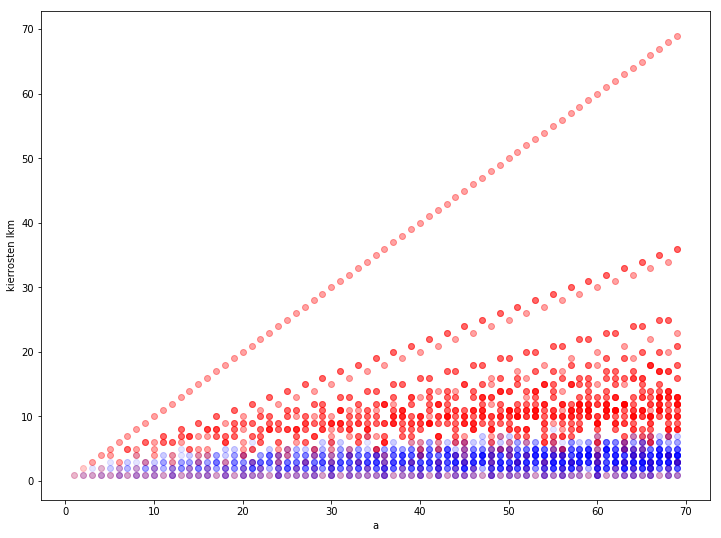

In [51]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(12, 9))

n = 70

for b in range(1, n):
    x = range(b, n)
    z1 = [syt(a, b)[1] for a in x]
    z2 = [eukl(a, b)[1] for a in x]
    axs.scatter(x, z2, c = 'b', alpha = 0.1)
    axs.scatter(x, z1, c = 'r', alpha = 0.2)

axs.set_xlabel('a')
axs.set_ylabel('kierrosten lkm')

plt.show()

Yllä on kuvaaja kierrosten lukumäärästä syötteen $a$ funktiona. Kuvaajan selkeyden vuoksi piirretään vain tapaukset, joissa $a \geq b$. Punaisella on merkitty algoritmin 1 tarvitsemien kierrosten lukumäärä. Algoritmin 1 kuviossa on muutamia haaroja, joissa kierroksia vaaditaan todella paljon, muun muassa $syt(a,1)$, $syt(a,2)$ ja $syt(a, a-1)$. Eukleideen algoritmin vaatimat kierrokset (sinisellä) taas kasvavat todella hillitysti. Kuvaajastakin havaitaan, että pahimmissa tapauksissa algoritmi 1 tarvitsee $a$ kierrosta.

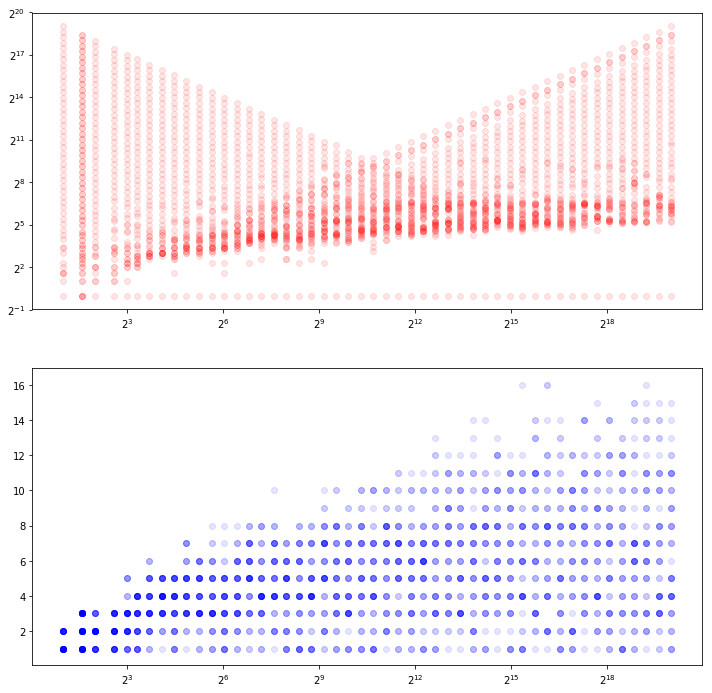

In [53]:
fig, axs = plt.subplots(2,figsize=(12, 12))

n = 20

x = np.rint(np.logspace(1, n, 50, base=2))

for a in x:
    z1 = [syt(a, b)[1] for b in x]
    z2 = [eukl(a, b)[1] for b in x]
    axs[0].scatter(x, z1, c='r', alpha=0.1)
    axs[1].scatter(x, z2, c='b', alpha=0.1)

axs[0].loglog(basex=2, basey=2)
axs[1].semilogx(basex=2)

plt.show()

Yllä vielä kuvattuna logaritmisella asteikolla molempien algoritmien tarvitsemien kierrosten määrää. Ensimmäisessä kuvaajassa molemmat akselit ovat logaritmisia, alemmassa y-akseli on lineaarinen. Algoritmissa 1 pahimmat tapaukset tarvitsevat siis eksponentiaalisen määrän kierroksia. Siksi ei ole mitään väliä sillä, miten monta bittioperaatiota yhden kierroksen suorittaminen vie. Luvun $1$ vähentäminen luvusta $a$ on vakioaikainen operaatio, mutta algoritmi muuttuu kelvottomaksi, jos vakioaikaisia operaatioita täytyy tehdä eksponentiaalinen määrä.

Eukleideen algoritmi taas näyttää kuvasta katsottuna suoriutuvan lineaarisessa määrässä kierroksia kaikissa tapauksissa. Voidaan todistaa, että Eukleideen algoritmissa kierroksia tarvitaan korkeintaan $O(n)$ kappaletta. Joissain tapauksissa vähemmällä ei selviä, esimerkiksi kun $a$ ja $b$ ovat peräkkäiset Fibonaccin luvut. Koska jakolasku voidaan tehdä ajassa $O(n^2)$, algoritmi kuuluu aikakompleksisuusluokkaan $O(n^3)$ ja se on toteutettava. Siis ongelma $GCD(a,b)$ on ratkaistava.

# Päätelmät

Voidaan todeta, että ratkaistaville ongelmille on olemassa melko yksinkertaisiakin ei-toteutettavia algoritmeja. Esimerkiksi voidaan testata, onko luku $a$ alkuluku kokeilemalla, jakaako mikään luku $i < \sqrt{a}$ luvun $a$. Tämä algoritmi selvästi antaa oikean vastauksen, mutta jakolaskuja pitää tehdä lähes eksponentiaalinen määrä luvun $a$ pituuden suhteen. On kuitenkin keksitty verrattomasti hienostuneempia deterministisiä algoritmeja, jotka ratkaisevat ongelman $PRIME(a)$ polynomiajassa, tosin hitaasti, ja todennäköisyysalgoritmeja, jotka toimivat kohtuullisessa ajassa.

Koulussa opetetaan, että "kertolasku on vain yhteenlaskua monta kertaa!" Kokonaisluvuille tämä pitääkin paikkansa, mutta mekaanisesti ne ovat aivan eri ongelma. Toistettu yhteenlasku 